In [1]:
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from registration_metrics import CARLA_dataset

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


__read results__

In [3]:
with open("CARLA-cosine-affinity-orth-planes.pkl", 'rb') as sfile:
    results_cosine = pickle.load(sfile)

In [4]:
with open("CARLA-euclidean-affinity-orth-planes.pkl", 'rb') as sfile:
    results_euclidean = pickle.load(sfile)

In [5]:
n_clust_cosine = [elem['AC_num_clusters'] for elem in results_cosine.values()]
n_points_cosine = [[len(plane) for plane in elem['orth_planes']] for elem in results_cosine.values()]
t_cosine = [elem['time_dict']['Orthogonal planes extraction'] for elem in results_cosine.values()]

n_clust_euclidean = [elem['AC_num_clusters'] for elem in results_euclidean.values()]
n_points_euclidean = [[len(plane) for plane in elem['orth_planes']] for elem in results_euclidean.values()]
t_euclidean = [elem['time_dict']['Orthogonal planes extraction'] for elem in results_euclidean.values()]

__compare number of extracted points__

In [15]:
plt.rcParams['font.size'] = 15

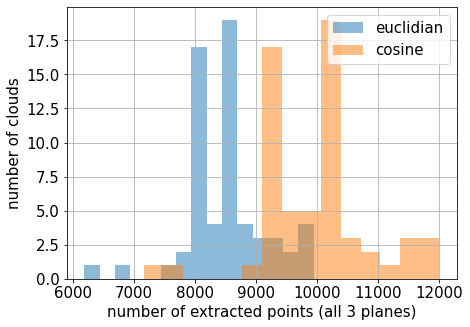

In [23]:
plt.figure(figsize=(7, 5))

plt.hist(np.array(n_points_euclidean).sum(1), 15, alpha=0.5, label='euclidian')
plt.hist(np.array(n_points_cosine).sum(1), 15, alpha=0.5, label='cosine')
plt.xlabel('number of extracted points (all 3 planes)')
plt.ylabel('number of clouds')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('orth_ss_num_points_cosine_vs_euclidian_CARLA')

In [45]:
np.mean(np.array(n_points_cosine).sum(1) / np.array(n_points_euclidean).sum(1)) - 1

0.17984453036280135

In [26]:
np.mean(np.array(n_points_cosine).sum(1)), np.array(n_points_euclidean).sum(1).mean()

(9970.803278688525, 8447.213114754099)

In [44]:
np.mean(np.array(n_points_cosine).sum(1)) / np.mean(np.array(n_points_euclidean).sum(1)) - 1

0.18036601459400714

18 % more points are extracted with cosine affinity

__compare time for extraction__

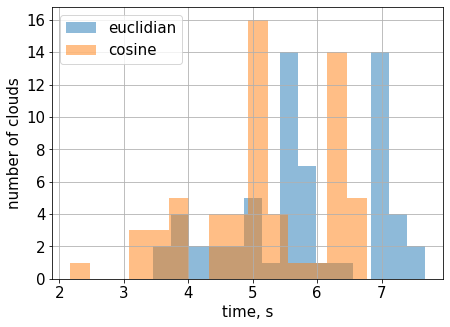

In [24]:
plt.figure(figsize=(7, 5))

plt.hist(t_euclidean, 15, alpha=0.5, label='euclidian')
plt.hist(t_cosine, 15, alpha=0.5, label='cosine')
plt.xlabel('time, s')
plt.ylabel('number of clouds')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('orth_ss_time_cosine_vs_euclidian_CARLA')

In [28]:
np.mean(np.array(t_cosine)), np.array(t_euclidean).mean()

(5.150292920284584, 5.787138438615643)

In [52]:
1 - np.mean(np.array(t_cosine) / np.array(t_euclidean))

0.11293281624795848

works 11 % faster with cosine affinity

__compare number of clusters__

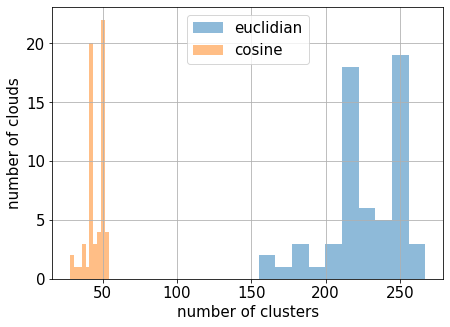

In [19]:
plt.figure(figsize=(7, 5))

plt.hist(n_clust_euclidean, 10, alpha=0.5, label='euclidian')
plt.hist(n_clust_cosine, 10, alpha=0.5, label='cosine')
plt.xlabel('number of clusters')
plt.ylabel('number of clouds')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('orth_ss_n_clusters_cosine_vs_euclidian_CARLA')

In [29]:
np.mean(np.array(n_clust_cosine)) , np.array(n_clust_euclidean).mean()

(45.721311475409834, 226.0)

In [54]:
1 - np.mean(np.array(n_clust_cosine) / np.array(n_clust_euclidean))

0.7979878468500166

5 times less clusters extracted with cosine affinity

__visualizations__

In [60]:
from registration_metrics.utils import visualize_clds

In [58]:
idx = np.argsort(np.array(n_points_cosine).sum(1) - np.array(n_points_euclidean).sum(1))[::-1]
idx

array([ 9, 11, 15, 60, 33, 10, 56, 38,  8, 25, 31, 29, 28, 27, 26, 21, 24,
       23, 22, 20, 19, 18, 17, 32, 30, 13, 12, 37, 34, 39,  2, 35, 14, 58,
        5, 59, 16, 51, 55, 54, 53, 52, 50, 48, 47, 46, 45, 44, 43, 42, 49,
       41, 40,  7, 36,  6,  3,  4,  0,  1, 57])

In [75]:
#cloud with biggest difference in number of extracted points
i = list(results_euclidean.keys())[idx[0]]
i

360

In [69]:
cld = CARLA_dataset(start_id=i, end_id=i + 1, dataset_coords_type="world").clds[0]

In [70]:
orth_ss_euc = results_euclidean[i]['orth_planes']
orth_ss_cos = results_cosine[i]['orth_planes']

In [ ]:
visualize_clds(clds=[cld, *orth_ss_euc], save_as=f'CARLA_orth_ss_{i}_ac=euclidean',
               draw=True, label_names=['cloud', 'set 1', 'set 2', 'set 3'])

In [ ]:
visualize_clds(clds=[cld, orth_ss_cos[1], orth_ss_cos[2], orth_ss_cos[0]], save_as=f'CARLA_orth_ss_{i}_ac=cosine',
               draw=True, label_names=['cloud', 'set 1', 'set 2', 'set 3'])